<a href="https://colab.research.google.com/github/LAUROJAS3/Seminario_RN/blob/main/LRC_P06_SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[texto del enlace](https://)**DETECTANDO SPAM**

In [ ]:
#SPAM

data = [[1, 1],
        [2, 1],
        [0, 0],
        [0, 2],
        [0, 1],
        [1, 0],
        [2, 2],
        [2, 0],
        [1, 2]]


target = [ 1,
           1,
           0,
           1,
           0,
           0,
           1,
           1,
           1]

In [ ]:
print("data", data)
print("target", target)

data [[1, 1], [2, 1], [0, 0], [0, 2], [0, 1], [1, 0], [2, 2], [2, 0], [1, 2]]
target [1, 1, 0, 1, 0, 0, 1, 1, 1]


In [ ]:
from tabulate import tabulate

w1 = 0.9
w2 = 0.9
b = 0.9

lr = 0.5

iterations = 10

data_out = []
weights = [[w1, w2, b]]

for epoch in range(iterations):
    for x, y in zip(data, target):
        yin = w1 * x[0] + w2 * x[1] + b

        # Función de activación
        if ( yin >= 0.5  ):
          yin = 1
        else:
            yin = 0

        e = y - yin

        if y != yin:  # Actualización de pesos
            w1 += lr * e * x[0]
            w2 += lr * e * x[1]
            b += lr * e

            # Guardar los pesos actualizados
            weights.append([w1, w2, b])

        data_out.append([epoch, x[0], x[1], yin, yin, y, e, w1, w2, b, int(y) != int(yin)])

    data_out.append(['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-'])

print(tabulate(data_out, headers=['Epoch', 'x1', 'x2', 'yin', 'y', 't', 'e', 'w1', 'w2', 'b', 'update']))

Epoch    x1    x2    yin    y    t    e    w1                  w2                  b                     update
-------  ----  ----  -----  ---  ---  ---  ------------------  ------------------  --------------------  --------
0        1     1     1      1    1    0    0.9                 0.9                 0.9                   False
0        2     1     1      1    1    0    0.9                 0.9                 0.9                   False
0        0     0     1      1    0    -1   0.9                 0.9                 0.4                   True
0        0     2     1      1    1    0    0.9                 0.9                 0.4                   False
0        0     1     1      1    0    -1   0.9                 0.4                 -0.09999999999999998  True
0        1     0     1      1    0    -1   0.4                 0.4                 -0.6                  True
0        2     2     1      1    1    0    0.4                 0.4                 -0.6                  False


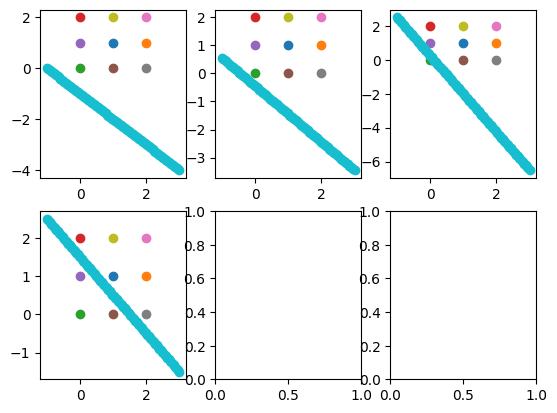

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a,b,c = w1,w2,b

data_arr = np.array( data )

x_min = min( data_arr[: ,0 ]-1)
x_max = max( data_arr[: ,0 ]+1)

x = np.linspace(x_min, x_max, 100)


pairs = []

for ws in weights:
  it = []
  #[w1, w2, b]
  for xi in  x :
    y = (-ws[2] -ws[0]*xi) /ws[1];
    it.append( [xi,y])

  pairs.append(it)

data_arr = np.array( data )
data_arr_x = data_arr [:, 0]
data_arr_y = data_arr [:, 1]

pairs = np.array(pairs)

fig, axis = plt.subplots(2, 3)

for idx,idy in zip ( data_arr_x, data_arr_y  ):
    axis[0,0].scatter(idx, idy )
    axis[0,1].scatter(idx, idy )
    axis[0,2].scatter(idx, idy )
    axis[1,0].scatter(idx, idy )

axis[0,0].scatter(pairs[0,: ,0], pairs[0, :,1] )
axis[0,1].scatter(pairs[1,: ,0], pairs[1, :,1]  )
axis[0,2].scatter(pairs[2,: ,0], pairs[2, :,1]  )
axis[1,0].scatter(pairs[3,: ,0], pairs[3, :,1]  )